# Machine Learning - introductory project - based on Programming with Mosh course

>Author: **Andrzej Kocielski**  
Github: [andkoc001](https://github.com/andkoc001/)  
Email: and.koc001@gmail.com

Created: 24-12-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/) at GitHub.

___

## Introduction - project background

### Problem statement and project objectives

Purpose: _to be updated..._

#### Steps of a ML project
Verbatim from _Code with Mosh_ tutorial course.

1. Import the data
2. Clean the data
3. Split the data into training / test sets
4. Create a model
5. Train the model
6. Make predictions
7. Evaluate and improve

___
## Project dataset

The data set we are going to use for this project is **video games sales** dataset available from kaggle.com website. The dataset for convenience is also available in this repository in file `vgsales.csv`.

### Python environment setup 

#### Importing Python libraries

The following Python libraries were used in synthesising the dataset variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

#### Load the dataset

Loading the dataset from `music.csv` file (taken from _CodewithMosh_ course). Assigning the dataset to a DataFrame named `df`.

In [2]:
df = pd.read_csv("music.csv")

### Basic information about the dataset

In [3]:
df.shape

(18, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
age       18 non-null int64
gender    18 non-null int64
genre     18 non-null object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
df.describe(include="all")

,age,gender,genre
count,18.000000,18.000000,18
unique,NaN,NaN,5
top,NaN,NaN,Classical
freq,NaN,NaN,6
mean,27.944444,0.500000,NaN
std,5.127460,0.514496,NaN
min,20.000000,0.000000,NaN
25%,25.000000,0.000000,NaN
50%,28.000000,0.500000,NaN
75%,31.000000,1.000000,NaN


In [6]:
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


### Project briefs

The project will be divided into two phases: 1) Data analysis, 2) Machine Learning.

1) In the first phase of the project, I would like to examine the dataset: Regression, Classification.

2) In the second phase of the project, I am going to build a model to predict the genre (output dataset, aka target), provided the age and gender is given (input dataset).

### 1) Data analysis

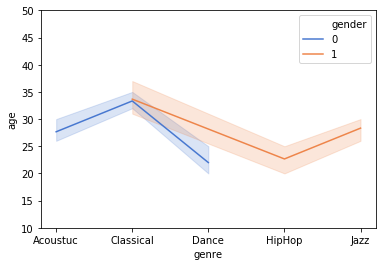

In [7]:
sns.lineplot(data=df, x="genre", y="age", palette="muted", hue="gender")
plt.ylim(10, 50) # expand the age axis
plt.show()

### 2) Machine Learning

This part will be done using `sklearn` library. More specifically, we will apply class `DecisionTreeClassifier` class from `sklearn.tree` method.

#### Data preparation

Assign input data sub-set to name `X` (capital x), and target to name `y`.

In [8]:
X = df.drop(columns=["genre"]) # input data subset
y = df["genre"] # output data subset (target)

#### Training model and predicting
We will apply `DecisionTreeClassifier()` class from `sklern.tree` library.

In [9]:
# Assigning model to `DecisionTreeClassifier` class.
model = tree.DecisionTreeClassifier()

Now, we will provide sample data (age and gender) and ask the model to predict what is the likely music genre.

In [10]:
sample_1 = [21, 1] # first number is age, the other is gender (1=male, 0=female)
sample_2 = [22, 0] # age 22, female

In [11]:
# for testing - requires model.fit() method - see below
# predictions = model.predict([ sample_1, sample_2 ])

#### Accessing the accuracy

Split the dataset into two: model train and model test using `train_test_split` method. The actual dataset will be split randomly into two subsets of declared below sizes (of train subset and test subset).

In [12]:
# Providing data to the model, so that it can learn about a pattern
# 20% of the original dataset is allocated for testing, rest for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # this function returns four variables

In [13]:
# training the model
model.fit(X_train, y_train) # two variables passed: input dataset and output dataset (target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Storing the model in a file, so it does not need to be processed again (just load the file). For this purpose `dump` function from the library `joblib` is used. 

In [14]:
# commented out for clarity only
#joblib.dump(model, "music-recommender.joblib") # writes the model to a file
#model = joblib.load("music-recommender.joblib") # loads the model from a file

The actual input values from the dataset (allocated for testing) are used to test the model. The predictions will be next compared to the actual results stored in `y_test` subset. The accuracy of the model will be assessed using `accuracy_score` function.

In [15]:
# predictions
predictions = model.predict(X_test) # real values from the dataset (allocated for testing) are used to test the model

# accuracy of the model 
accuracy_score(y_test, predictions)

1.0

### Visualising Decision Tree

Visualisation of the Decision Tree will be done with help of `tree.export_graphviz` function.

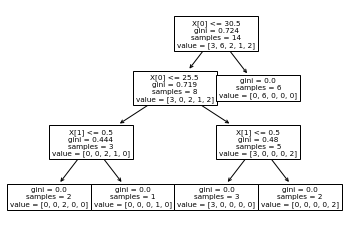

In [16]:
tree.plot_tree(model.fit(X_train, y_train))
plt.show()

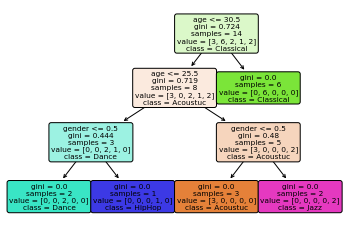

<Figure size 640x480 with 0 Axes>

In [17]:
tree.plot_tree(model.fit(X_train, y_train), feature_names=["age", "gender"], class_names=sorted(y.unique()), label="all", rounded=True, filled=True)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

Exporting the visualisation to a file (dot file format).

In [18]:
tree.export_graphviz(model, out_file="music_recommender.dot", feature_names=["age", "gender"], class_names=sorted(y.unique()), label="all", rounded=True, filled=True)

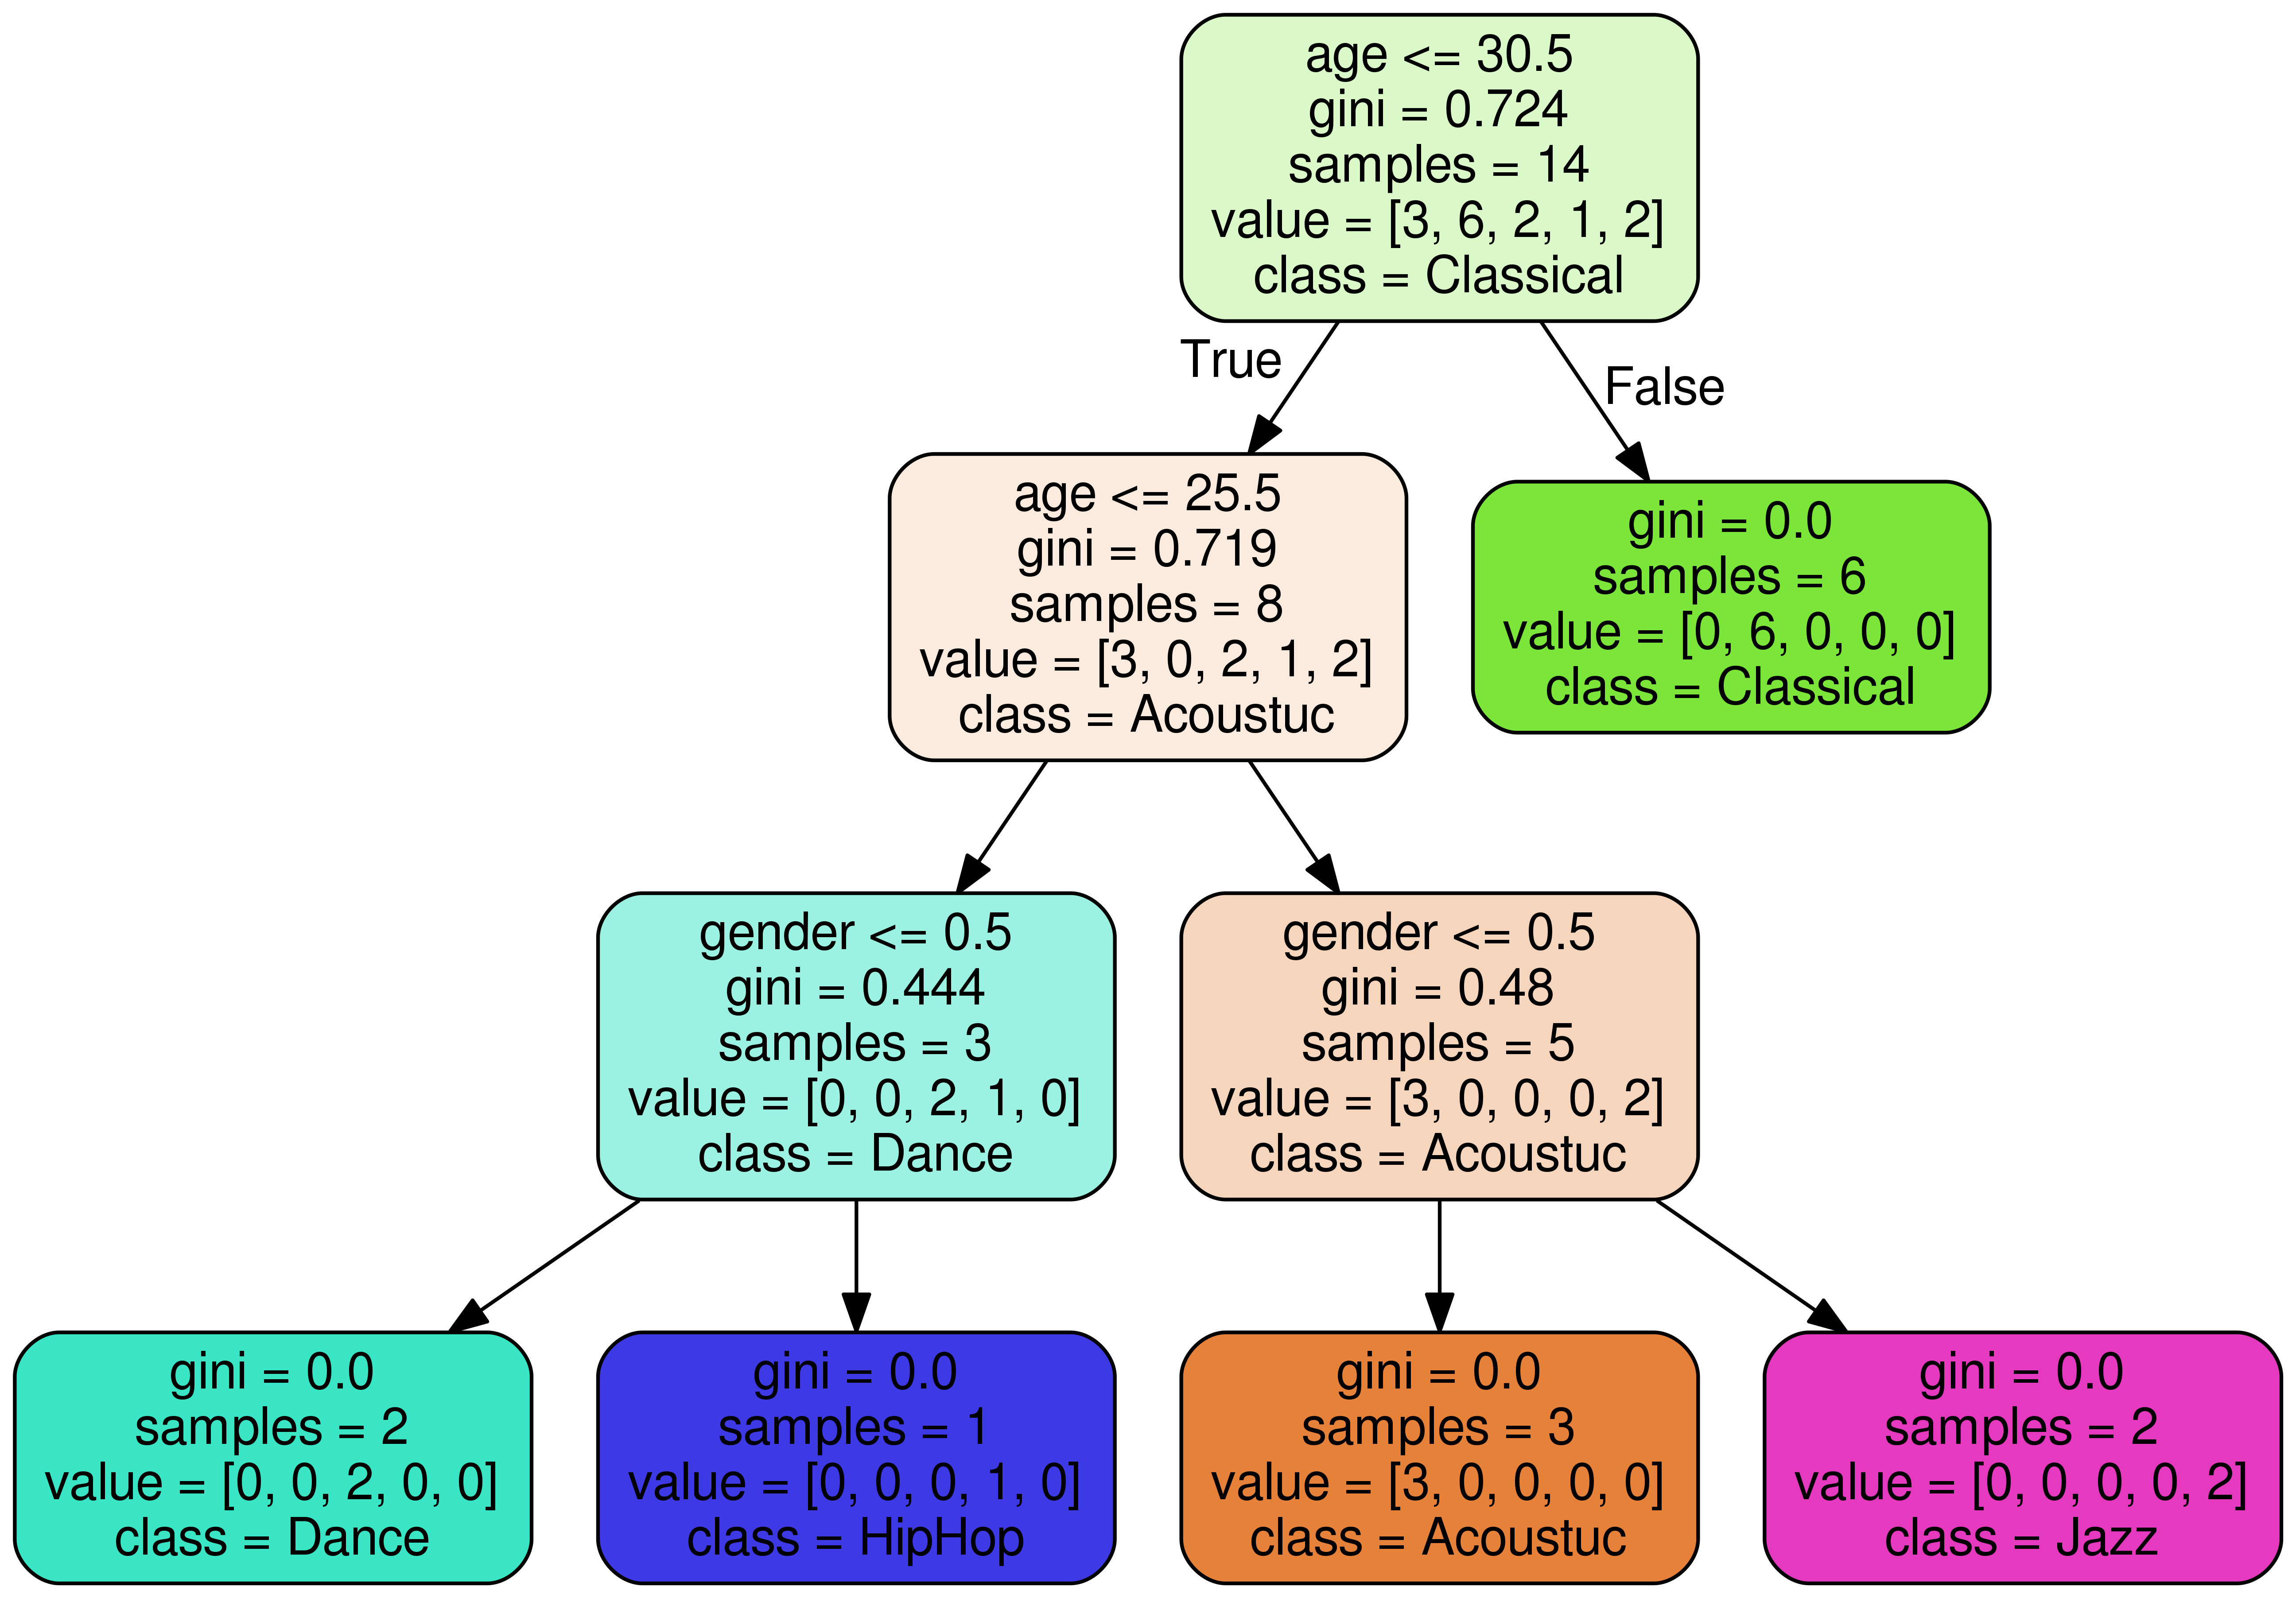

In [19]:
# from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'music_recommender.dot', '-o', 'music_recommender.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'music_recommender.png')

___
## References and bibliography 

### Project related

- Hamedani, M., The Complete Python Course [online] Available at: <https://codewithmosh.com/courses/> [Accessed December 2019]


### Numerical tools

- SciPy - Reference Guide. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/> [Accessed December 2019].
- NumPy - Documentation. [online] Available at: <https://numpy.org/doc/> [Accessed December 2019].
- Pandas - Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/> [Accessed November 2019].
- Scikit Learn (aka Sklearn) - Documentation [online]. Available at: <https://scikit-learn.org/stable/user_guide.html> [Accessed December 2019]

___
Andrzej Kocielski